CIFAR-10 setup

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Load CIFAR-10 dataset
(train_val_images, train_val_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Split train into train (40k) and validation (10k)
train_val_size = len(train_val_images)
indices = np.random.permutation(train_val_size)
train_idx, val_idx = indices[:40000], indices[40000:]

train_images, train_labels = train_val_images[train_idx], train_val_labels[train_idx]
val_images, val_labels = train_val_images[val_idx], train_val_labels[val_idx]

# Normalize pixel values to [0, 1] (different approach than PyTorch)
train_images = train_images.astype('float32') / 255.0
val_images = val_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Data augmentation for training
train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    width_shift_range=0.1,  # Similar to RandomCrop with padding=4
    height_shift_range=0.1,
    fill_mode='constant',  # Pad with zeros
    cval=0.0
)

# No augmentation for validation/test
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Create data loaders
batch_size = 128

train_loader = train_datagen.flow(
    train_images,
    train_labels,
    batch_size=batch_size,
    shuffle=True
)

val_loader = val_datagen.flow(
    val_images,
    val_labels,
    batch_size=batch_size,
    shuffle=False
)

test_loader = test_datagen.flow(
    test_images,
    test_labels,
    batch_size=batch_size,
    shuffle=False
)

# Print dataset sizes
print(f"Training samples: {len(train_images)}")
print(f"Validation samples: {len(val_images)}")
print(f"Test samples: {len(test_images)}")

# Verify one batch
x_batch, y_batch = next(train_loader)
print(f"Batch shape: {x_batch.shape}")
print(f"Label shape: {y_batch.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
# Define the ANN model
ann_model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)), # Flatten the 32x32 color image
    layers.Dense(128, activation='relu'), # Fully connected layer with ReLU activation
    layers.Dense(10) # Output layer for 10 classes
])

print("Training ANN model......")
# Compile the ANN model
ann_model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

# Define the CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the CNN model
cnn_model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

# Train the ANN model
ann_history = ann_model.fit(
    train_loader,
    epochs=10,
    validation_data=val_loader
)

print("Training CNN model......")
# Train the CNN model
cnn_history = cnn_model.fit(
    train_loader,
    epochs=10,
    validation_data=val_loader
)

Training ANN model......
Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 80ms/step - accuracy: 0.2242 - loss: 2.1447 - val_accuracy: 0.3006 - val_loss: 1.9463
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.3198 - loss: 1.8947 - val_accuracy: 0.2995 - val_loss: 1.9726
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.3412 - loss: 1.8327 - val_accuracy: 0.3180 - val_loss: 1.8778
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.3538 - loss: 1.7989 - val_accuracy: 0.3343 - val_loss: 1.8404
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.3572 - loss: 1.7784 - val_accuracy: 0.3467 - val_loss: 1.8181
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.3738 - loss: 1.7512 - val_accuracy: 0.3293 - val_loss: 1.8678
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.3776 - loss: 1.7352 - val_accuracy: 0.3597 - val_loss: 1.7870
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy:

Now Plot Training and Validation Loss Curves

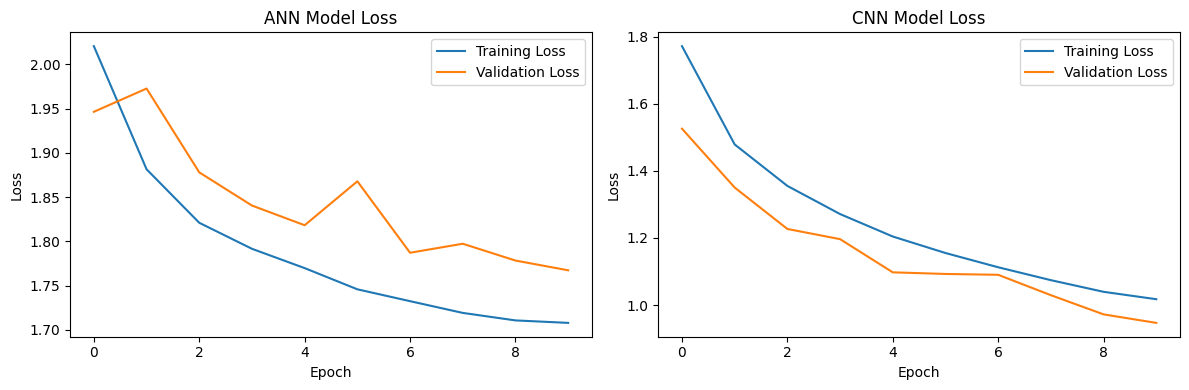

In [5]:
import matplotlib.pyplot as plt

# Plot training and validation loss for the ANN model
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(ann_history.history['loss'], label='Training Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.title('ANN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation loss for the CNN model
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.3808
Precision (macro): 0.4140599710243477
Recall (macro): 0.3808
F1-score (macro): 0.3665869669286592


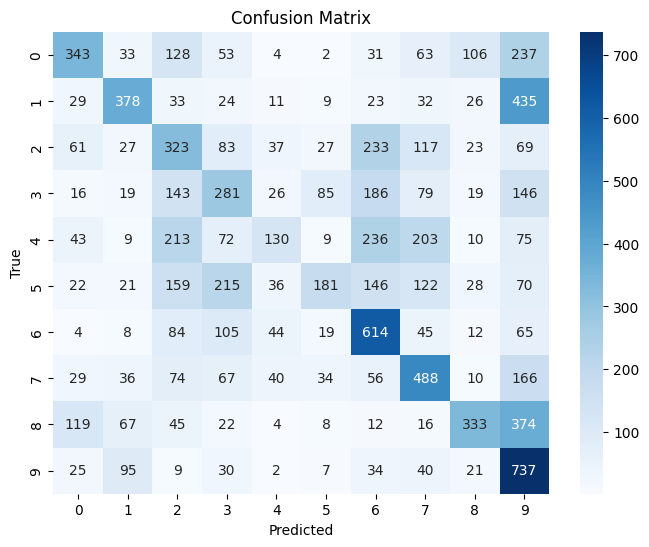

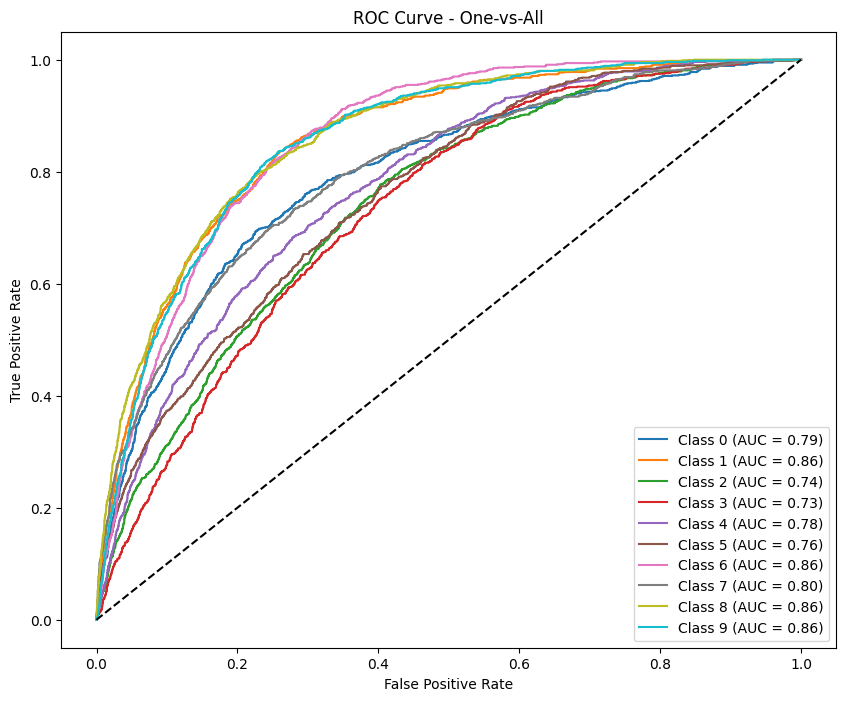

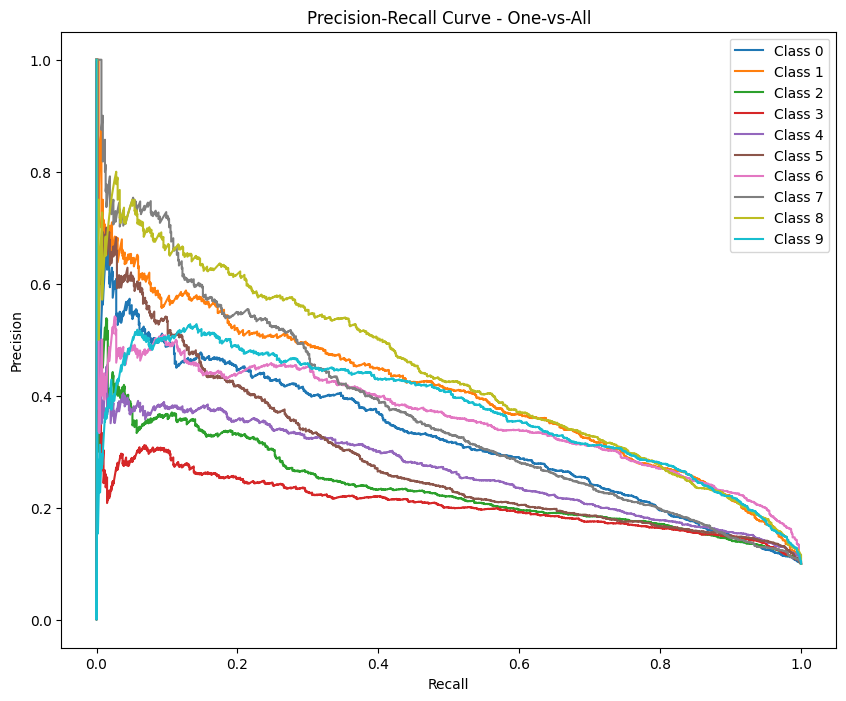

In [14]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# True labels and predicted probabilities
y_true = test_labels.flatten()
y_prob = ann_model.predict(test_images)
y_pred = np.argmax(y_prob, axis=1)

# Accuracy, Precision, Recall, F1-Score
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision (macro):", precision_score(y_true, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_true, y_pred, average='macro'))
print("F1-score (macro):", f1_score(y_true, y_pred, average='macro'))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("confusion_matrix.png")
plt.show()

# ROC-AUC Curve (One-vs-All)
n_classes = y_prob.shape[1]
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    auc_score = roc_auc_score(y_true_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - One-vs-All")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.savefig("roc_auc_curve.png")
plt.show()

# Precision-Recall Curve (Optional)
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_prob[:, i])
    plt.plot(recall, precision, label=f"Class {i}")

plt.title("Precision-Recall Curve - One-vs-All")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.savefig("precision_recall_curve.png")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
Accuracy: 0.6709
Precision (macro): 0.6762664511019313
Recall (macro): 0.6709
F1-score (macro): 0.6682542772918821


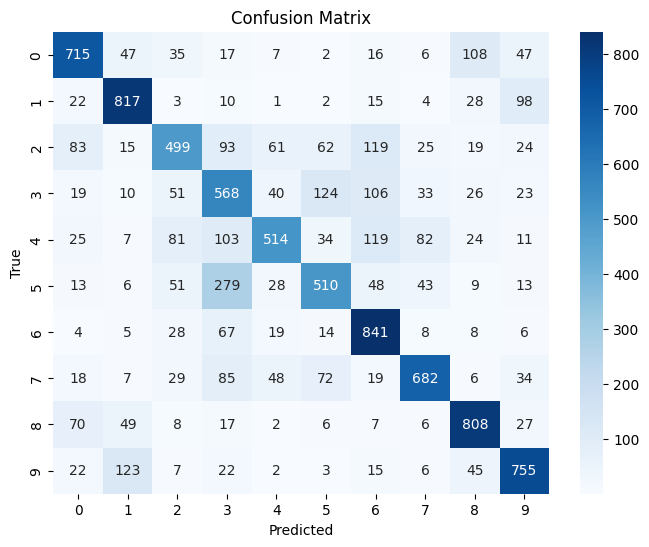

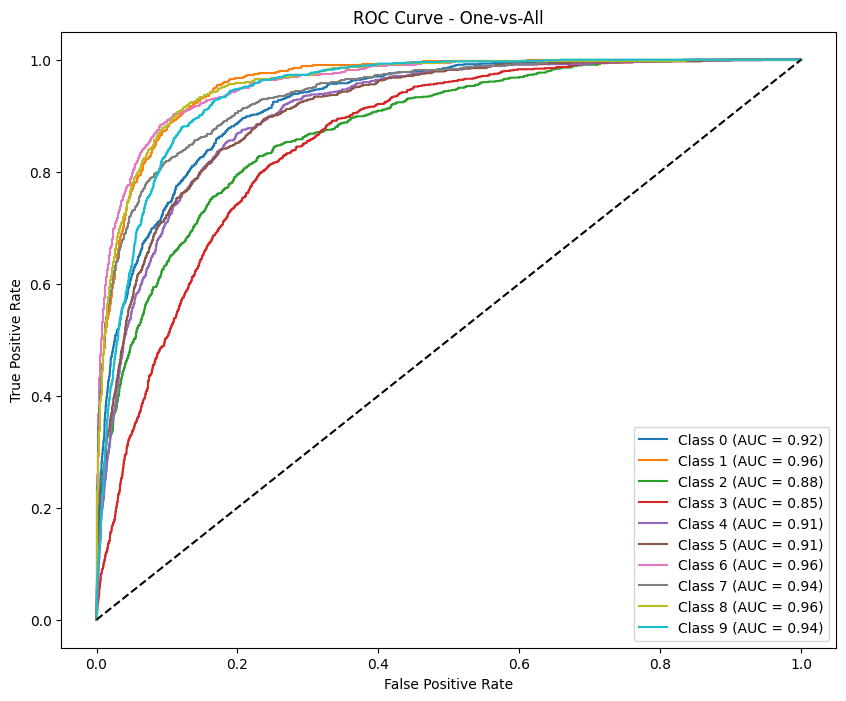

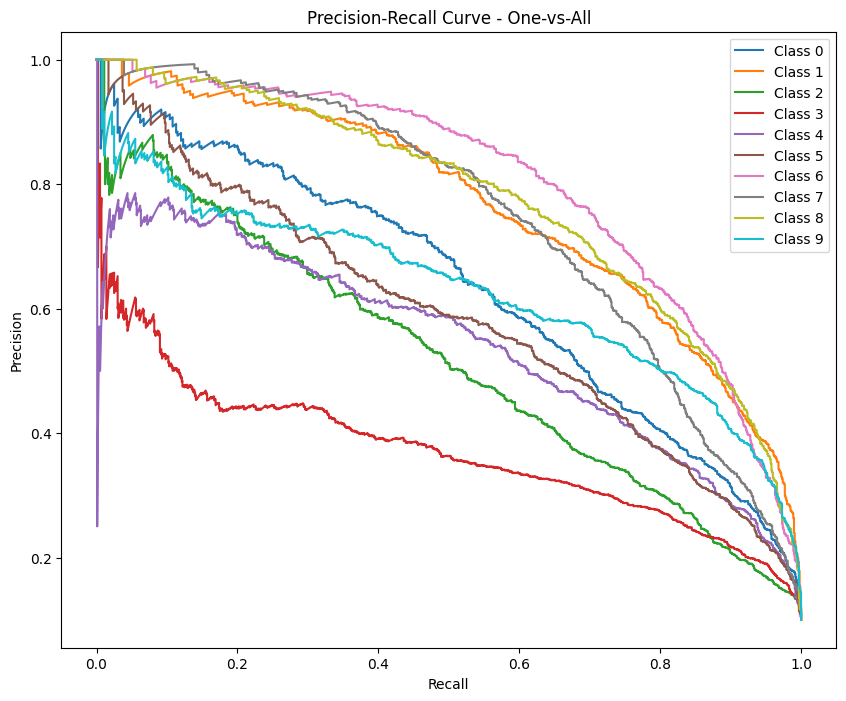

In [15]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# True labels and predicted probabilities
y_true = test_labels.flatten()
y_prob = cnn_model.predict(test_images)
y_pred = np.argmax(y_prob, axis=1)

# Accuracy, Precision, Recall, F1-Score
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision (macro):", precision_score(y_true, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_true, y_pred, average='macro'))
print("F1-score (macro):", f1_score(y_true, y_pred, average='macro'))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("confusion_matrix.png")
plt.show()

# ROC-AUC Curve (One-vs-All)
n_classes = y_prob.shape[1]
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    auc_score = roc_auc_score(y_true_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - One-vs-All")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.savefig("roc_auc_curve.png")
plt.show()

# Precision-Recall Curve (Optional)
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_prob[:, i])
    plt.plot(recall, precision, label=f"Class {i}")

plt.title("Precision-Recall Curve - One-vs-All")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.savefig("precision_recall_curve.png")
plt.show()
